In [55]:
import logging
logging.root.setLevel(logging.INFO)


In [56]:
import random

from xcs import XCSAlgorithm
from xcs.scenarios import Scenario

In [57]:
from utils.xcs_utils import *

In [58]:
exploration_cycles = 1000
exploitation_cycles = 500
input_size = 8
logging.root.setLevel(logging.INFO)
scenario = MazeScenario(input_size)
scenario.maze.reset()
scenario.maze.render()


■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ □ □ $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ A ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [59]:
import numpy as np
algorithm = XCSAlgorithm()
algorithm.max_population_size = 1600
algorithm.learning_rate = .1
algorithm.error_threshold = .01              # epsilon_0
algorithm.ga_threshold = 99999999999999999999999999999999999# 25
algorithm.crossover_probability = 0.5
algorithm.mutation_probability = 0.01
algorithm.initial_prediction = float(np.finfo(np.float32).tiny)        # p_I
algorithm.initial_error = float(np.finfo(np.float32).tiny)            # epsilon_I
algorithm.initial_fitness = float(np.finfo(np.float32).tiny)           # F_I
algorithm.wildcard_probability = 0.0

In [60]:
other_metrics = other_avg_experiment(
                                     maze=scenario,
                                     algorithm=algorithm,
                                     number_of_tests=3,
                                     explore_trials=exploration_cycles,
                                     exploit_trials=exploitation_cycles
                                    )


Executing 0 experiment
Executing 1 experiment
Executing 2 experiment


In [61]:
display(other_metrics)

,steps_in_trial,population,numerosity
trial,,,
0,19.666667,18.333333,18.333333
100,50.000000,200.000000,200.000000
200,37.666667,200.000000,200.000000
300,16.333333,200.000000,200.000000
400,47.000000,200.000000,200.000000
500,45.000000,200.000000,200.000000
600,14.333333,200.000000,200.000000
700,38.333333,200.000000,200.000000
800,35.000000,200.000000,200.000000


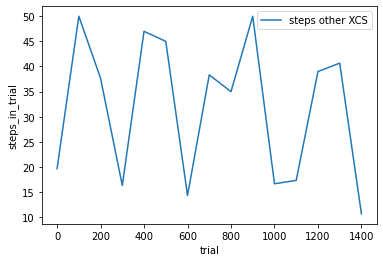

In [62]:
import pandas as pd

ax = other_metrics["steps_in_trial"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps other XCS"])

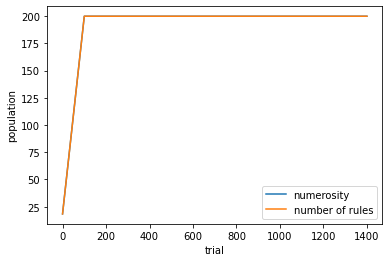

In [63]:
ax = other_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

In [64]:
from lcs.agents.xcs import Configuration
from utils.xcs_utils import *
                    

cfg = Configuration(number_of_actions=8,
                    max_population=1600,
                    covering_wildcard_chance = 1,
                    ga_threshold = 9999999999999999999999999,
                    metrics_trial_frequency=100,
                    mutation_chance=0.01,
                    user_metrics_collector_fcn=xcs_metrics)

In [ ]:
from lcs.agents.xcs import XCS


agent = XCS(cfg)
my_metrics = avg_experiment(scenario,
                    cfg,
                    number_of_tests=3,
                    explore_trials=exploration_cycles,
                    exploit_metrics=exploitation_cycles)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [2.542660842952075e-40, 2.537130172520431e-40, 5.747311643168374e-41, 2.5661902908747764e-40, 2.5279465835752264e-40, 2.6827109163905025e-40, 3.286006579805948e-40, 6.389912272244871e-77], 'perf_time': 0.012249299999893992, 'population': 72, 'numerosity': 72}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 23, 'reward': [21.462757360749155, 15.052053970116882, 147.49131769766697, 15.061450525086169, 15.769469879384527, 16.368617318230157, 17.67312044107236, 12.237041235694013], 'perf_time': 0.012048999999933585, 'population': 208, 'numerosity': 208}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 23, 'reward': [192.744951873435, 23.06297297801297, 20.961107524277068, 13.550150821805328, 9.977576187566102, 8.320969885347477, 14.534055769675778, 11.444739841616927], 'perf_time': 0.012529500000027838, 'population': 208, 'numerosity': 208}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 18, 'reward': [33.96410653852179, 8.091225474355216, 112.79871547916159, 11.104911509917788, 10.489065281282523, 10.972637743716628, 13.930475205341489, 11.673031387638563], 'perf_time': 0.010326399999939895, 'population': 208, 'numerosity': 208}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 1, 'reward': [181.53370013783544, 9.05844

In [ ]:
display(my_metrics)

In [ ]:
import pandas as pd

ax = my_metrics['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])


In [ ]:
ax = my_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

#### Conclusions
None so far.